# Part 1

- Null Hypothesis – There is no significant difference among the groups
- Alternate Hypothesis – There is a significant difference among the groups
- The significance level of an event (such as a statistical test) is the probability that the event could have occurred by  chance. If the level is quite low, that is, the probability of occurring by chance is quite small, we say the event is  significant.
- freedom of model: 2 is the degrees of freedom of the power, that means the variability due to the power.
- error terms: 12 is the unexplained random error.
- total DoF: 14 is the total Degrees of Freedom, that means the total variation in the data from the mean.

# Part 2

In [19]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [2]:
data = pd.read_excel('anova_lab_data.xlsx')

In [3]:
data

,Power,Etching Rate
0,160 W,5.43
1,180 W,6.24
2,200 W,8.79
3,160 W,5.71
4,180 W,6.71
5,200 W,9.20
6,160 W,6.22
7,180 W,5.98
8,200 W,7.90
9,160 W,6.01


In [4]:
data = data.rename(columns={"Etching Rate": "Etching_Rate", "Power ": "Power"})

In [5]:
data['Power'].unique

<bound method Series.unique of 0     160 W
1     180 W
2     200 W
3     160 W
4     180 W
5     200 W
6     160 W
7     180 W
8     200 W
9     160 W
10    180 W
11    200 W
12    160 W
13    180 W
14    200 W
Name: Power, dtype: object>

In [6]:
data.dtypes

Power            object
Etching_Rate    float64
dtype: object

In [7]:
data['Power'] = data['Power'].str[:3]

In [8]:
data

,Power,Etching_Rate
0,160,5.43
1,180,6.24
2,200,8.79
3,160,5.71
4,180,6.71
5,200,9.20
6,160,6.22
7,180,5.98
8,200,7.90
9,160,6.01


In [9]:
data['Power'] = data['Power'].astype(int)

In [10]:
data.dtypes

Power             int32
Etching_Rate    float64
dtype: object

In [11]:
model=ols('Etching_Rate ~ C(Power)', data=data).fit()

In [12]:
results_table=sm.stats.anova_lm(model)

In [13]:
results_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Power),2.0,18.176653,9.088327,36.878955,0.000008
Residual,12.0,2.957240,0.246437,NaN,NaN


In [14]:
#Conclusion: As PR(>F) is less than 0.05 then the null hypothesis is rejected and the alternative hypothesis is supported.
#We can say that there is a variation in the three groups

<AxesSubplot:title={'center':'Etching_Rate'}, xlabel='[Power]'>

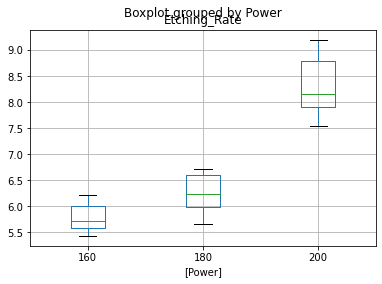

In [17]:
data.boxplot(by='Power')  

C:\Users\Agus\anaconda3\envs\class\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Power', ylabel='Etching_Rate'>

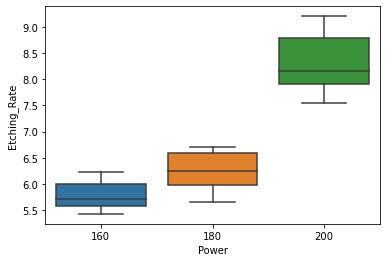

In [24]:
sns.boxplot(data["Power"],data["Etching_Rate"])